# Задание по теме «Численное интерполирование функций»

Построить сплайны 3-го порядка для функции y = f(x), заданной таблично на отрезке [a; b], уплотнить таблицу значений функции с шагом 1, построить многочлен Лагранжа по формулам и с помощью линии тренда в Excel, построить первый и второй интерполяционные многочлены Ньютона. Провести сравнение интерполирования значений функции различными методами.

## Интерполяция сплайнами

Задаю интерполируемую функцию

In [3]:
import numpy as np

X = np.array([2, 3, 5, 7])
Y = np.array([4, -2, 6, -3])
n = X.shape[0]-1

Определеяю длину частичного отрезка:
$$
h_i = x_i-x_{i-1}\ (i=1, 2, ..., n).
$$

In [4]:
h = np.empty(n)
for i in range(n):
    h[i] = X[i+1] - X[i]
print('h:',h)

h: [1. 2. 2.]


Получаю систему уравнений :
$$
S_i(x) = y_{i-1} + b_i(x-x_{i-1})+c_i(x-x_{i-1})^2+d_i(x-x_{i-1})^3,
$$
$$
i=1, 2, ..., n.
$$

In [5]:
for i in range(n):
    print(f'S{i+1} = {Y[i]} + b{i+1}(x - {X[i]}) + c{i+1}(x - {X[i]})^2 + d{i+1}(x - {X[i]})^3')

S1 = 4 + b1(x - 2) + c1(x - 2)^2 + d1(x - 2)^3
S2 = -2 + b2(x - 3) + c2(x - 3)^2 + d2(x - 3)^3
S3 = 6 + b3(x - 5) + c3(x - 5)^2 + d3(x - 5)^3


Задаю функцию для нахождения матрицы системы уравнений вида:
$$
b_ih_i + c_ih^2_i + d_ih^3_i = y_i-y_{i-1}\ (i=1, 2, ..., n),
$$
$$
b_{i+1}-b_i-2c_ih_i-3d_ih^2_i= 0\ (i=1, 2, ..., n-1),
$$
$$
c_{i+1} -c_i-3d_ih_i=0\ (i=1, 2, ..., n-1),
$$
$$
c_1=0,
$$
$$
c_n+3d_nh_n=0.
$$

In [7]:
def find_spline_matrix(n, h):
    A = np.zeros((3*n, 3*n))
    B = np.zeros(3*n)
    k = 0
    for i in range(3*n):
        if i in range(n):
            if i == 0:
                k=0
            B[i] = Y[i+1] - Y[i]
            for j in range(n):
                A[i][j+k] = np.power(h[i],j+1)
            k+=n
        if i in range(n, 2*n-1):
            if i == n:
                k = 0
            for j in range(n+1):
                if j == 0:     
                    A[i][j+k] = -1
                elif j == n:
                    A[i][j+k] = 1
                else:
                    A[i][j+k] = -1*(j+1)*np.power(h[i-n],j)
            k+=n
        if i in range(2*n-1, 2*n+1):
            if i == 2*n-1:
                k = 1
            for j in range(n+1):
                if j == 0:     
                    A[i][j+k] = -1
                if j == n:
                    A[i][j+k] = 1
                if j == 1:
                    A[i][j+k] = -3*h[i-n-2]
            k+=n
        if i == 2*n+1:
            A[i][1] = 1
        if i == 3*n-1:
            A[i][i-1] = 1
            A[i][i] = 3*h[n-1]
    return A, B
A, B = find_spline_matrix(n,h)
print("Матрица системы уравнений A:")
print(A)
print("Вектор B:")
print(B)

Матрица системы уравнений A:
[[  1.   1.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   2.   4.   8.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   2.   4.   8.]
 [ -1.  -2.  -3.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  -1.  -4. -12.   1.   0.   0.]
 [  0.  -1.  -3.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  -1.  -6.   0.   1.   0.]
 [  0.   1.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   1.   6.]]
Вектор B:
[-6.  8. -9.  0.  0.  0.  0.  0.  0.]


Нахожу решение этой системы уравнений:

In [8]:
x = np.linalg.solve(A,B)
print(x)

[-8.20454545 -0.          2.20454545 -1.59090909  6.61363636 -1.90909091
  1.95454545 -4.84090909  0.80681818]


Записываю полученные решения в коэффициенты b, c, d:

In [10]:
b = []
c = []
d = []
x = np.reshape(x, (n,n))
b = x[:,0]
c = x[:,1]
d = x[:,2]
print('b: ',b)
print('c: ',c)
print('d: ',d)

b:  [-8.20454545 -1.59090909  1.95454545]
c:  [-0.          6.61363636 -4.84090909]
d:  [ 2.20454545 -1.90909091  0.80681818]


Проверяю полученные коэффициенты с помощью первого уравнения:
$$
b_1 + c_1 + d_1 = -6
$$

In [12]:
print(b[0] + c[0] + d[0])

-6.0


Полученные значения коэффициентов определяют искомый сплайн.

Убедимся, что значения соседних выражений сплайна в узловых точках совпадают, а также наблюдается совпадение этих значений с табличными значениями функции F(x).

In [19]:
print('Y = ',Y)
s = np.empty((n,n+1))
for i in range(n):
    for j in range(n+1):
        s[i][j] = Y[i] + b[i]*(X[j] - X[i]) + c[i]*(X[j] - X[i])**2 + d[i]*(X[j] - X[i])**3
    print(f'S{i} =',s[i,:])

Y =  [ 4 -2  6 -3]
S0 = [  4.          -2.          38.90909091 238.54545455]
S1 = [  8.11363636  -2.           6.         -24.72727273]
S2 = [-65.21590909 -23.72727273   6.          -3.        ]


Кроме того, практически  совпадают значения производных S<sup>1</sup> и S<sup>2</sup> в узле X=3, также как и производных S<sup>2</sup> и S<sup>3</sup> в узле X=5, что обеспечивает гладкость совокупного кубического сплайна.

In [23]:
print('X =',X)
ss = np.empty((n,n+1))
for i in range(n):
    for j in range(n+1):
        ss[i][j] = b[i] + 2*c[i]*(X[j] - X[i]) + 3*d[i]*(X[j] - X[i])**2
    print(f'S\'{i} =',ss[i,:])

X = [2 3 5 7]
S'0 = [ -8.20454545  -1.59090909  51.31818182 157.13636364]
S'1 = [-20.54545455  -1.59090909   1.95454545 -40.31818182]
S'2 = [52.78409091 31.          1.95454545 -7.72727273]


## Многочлен Лагранжа

$$
  L_3(x) = 4\frac{(x-3)(x-5)(x-7)}{(2-3)(2-5)(2-7)}\ -2\frac{(x-2)(x-5)(x-7)}{(3-2)(3-5)(3-7)}\ +6\frac{(x-2)(x-3)(x-7)}{(5-2)(5-3)(5-7)}\ -3\frac{(x-2)(x-3)(x-5)}{(7-2)(7-3)(7-5)}\ = 
$$
$$
    =-\frac{4}{15}\ (x^3 -15x^2 +71x-105) - \frac{2}{8}\ (x^3 -14x^2 +59x-70) - \frac{6}{12}\ (x^3 -12x^2 +41x-42) - \frac{3}{40}\ (x^3 -10x^2 +31x-30) = 
$$
$$
    =
$$

Объявляю функцию для нахождения значений полинома Лагранжа

In [209]:
def find_lagrange_f(X, Y, a):
    n = X.shape[0]
    f = 0
    for i in range(n):
        l = 1
        for j in range(n):
            if i!=j:
                l *= ((a-X[j])/(X[i]-X[j]))
        l *= Y[i]
        f += l
    return f

Рисую график

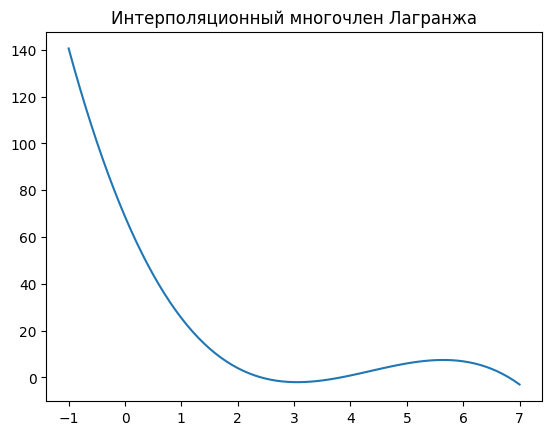

In [65]:
import matplotlib.pyplot as plt 
aa = []
x_new = np.arange(-1.0, 7.1, 0.1)
for a in x_new:
    aa.append(find_lagrange_f(X,Y,a))
plt.plot(x_new, aa)
plt.title('Интерполяционный многочлен Лагранжа')
plt.show()

## Первый интерполяционный многочлен Ньютона.

Нахожу таблицу разностей

In [212]:
X_step_2 = np.array([i for i in range(-1,8,2)])
Y_step_2 = np.array([find_lagrange_f(X,Y,i) for i in X_step_2])
n = Y_step_2.shape[0]
d_y = np.zeros((n,n))
d_y[0] = Y_step_2
for i in range(1, n):
    for j in range(n-i):
        d_y[i][j] = np.round((d_y[i-1][j+1] - d_y[i-1][j]),6)
print(d_y)

[[ 140.6   25.4   -2.     6.    -3. ]
 [-115.2  -27.4    8.    -9.     0. ]
 [  87.8   35.4  -17.     0.     0. ]
 [ -52.4  -52.4    0.     0.     0. ]
 [   0.     0.     0.     0.     0. ]]


Нахожу значения функции в узлах.

[140  25  -2   5  -3]


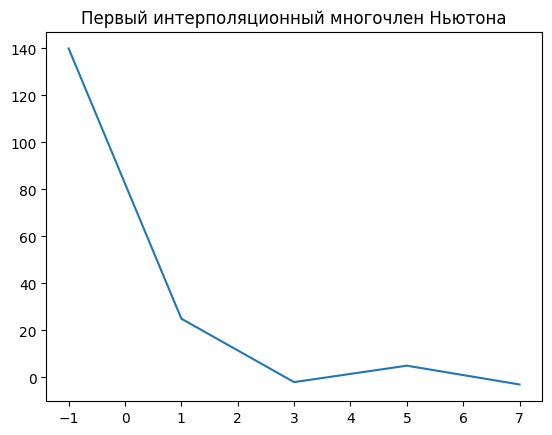

In [213]:
def find_FNIF(X, h, d_y):
    Y_new = np.zeros_like(X)
    for n in range(X.shape[0]):
        t = (X[n]-X[0])/h
        Y_new[n] = d_y[0][0] + t*d_y[1][0]+t*(t-1)*d_y[2][0]/2+t*(t-1)*(t-2)*d_y[3][0]/6
    return Y_new
print(find_FNIF(X_step_2, 2, d_y))
plt.plot(X_step_2, find_FNIF(X_step_2, 2, d_y))
plt.title('Первый интерполяционный многочлен Ньютона')
plt.show()

## Второй интерполяционный многочлен Ньютона.

[396 140  25  -2   6]


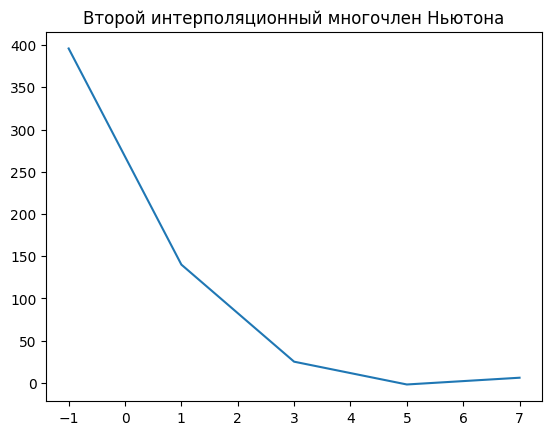

In [214]:
def find_SNIP(X, h, d_y):
    Y_new = np.zeros_like(X)
    for n in range(X.shape[0]):
        t = (X[n]-X[X.shape[0]-1])/h
        Y_new[n] = d_y[0][3] + t*d_y[1][2]+t*(t+1)*d_y[2][1]/2+t*(t+1)*(t+2)*d_y[3][0]/6
    return Y_new
print(find_SNIP(X_step_2, 2, d_y))
plt.plot(X_step_2, find_SNIP(X_step_2, 2, d_y))
plt.title('Второй интерполяционный многочлен Ньютона')
plt.show()

## Стабулирование

[140.6   68.75  25.4    4.    -2.     0.85   6.     6.9   -3.  ]


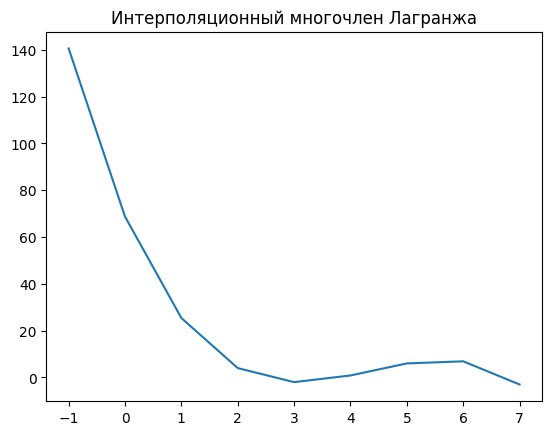

In [215]:
def subtab(A, B, H0, H, Y0, Y1, Y2,Y3):
    Y_new_step = []
    for x in range(A,B+1,H):
        T = (x-A)/H0
        Y = Y0 + T*Y1+T*(T-1)*Y2/2+T*(T-1)*(T-2)*Y3/6
        D = 1e-05*T*(T-1)*(T-2)/6
        # print(x,Y,'{0:.8f}'.format(D))
        Y_new_step.append(Y)
    Y_new_step = np.array(Y_new_step)
    return Y_new_step


Y_step_1 = subtab(X_step_2[0], X_step_2[-1], 2, 1, d_y[0][0], d_y[1][0], d_y[2][0], d_y[3][0])   
print(Y_step_1)  
plt.plot(range(-1,8,1), Y_step_1)
plt.title('Интерполяционный многочлен Лагранжа')
plt.show()

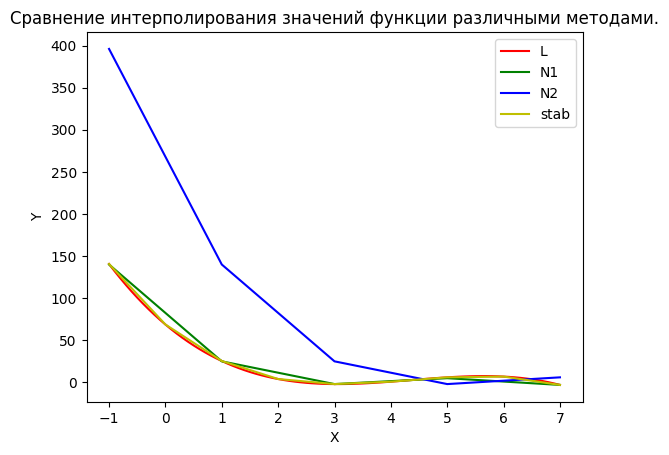

In [216]:
plt.plot(x_new, aa, color='r', label='L')
plt.plot(X_step_2, find_FNIF(X_step_2, 2, d_y), color='g', label='N1')
plt.plot(X_step_2, find_SNIP(X_step_2, 2, d_y), color='b', label='N2')
plt.plot(range(-1,8,1), Y_step_1, color='y', label='stab')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Сравнение интерполирования значений функции различными методами.")
plt.legend()
plt.show()